In [ ]:
# Moving Average & Exponentially Weighted Moving Average 

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving airline_passengers.csv to airline_passengers.csv


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
airline = pd.read_csv('airline_passengers.csv')
airline

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
airline = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)
airline

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


To Resolve the Moving Average Issues 

1. Rolling: Its Provides rolling Windows calculations 
2. EWM:Provides exponential weighted functions

In [ ]:
airline.dropna(inplace=True)
airline

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


Simple Moving Average ( SMV) 

In [ ]:
airline['6-month-SMA']=airline['Thousands of Passengers'].rolling(window=6).mean()
airline

,Thousands of Passengers,6-month-SMA
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
...,...,...
1960-08-01,606,519.166667
1960-09-01,508,534.000000
1960-10-01,461,534.000000


In [ ]:
airline['12-month-SMA']=airline['Thousands of Passengers'].rolling(window=12).mean()
airline['6-month-SMA']=airline['Thousands of Passengers'].rolling(window=6).mean()
airline['3-month-SMA']=airline['Thousands of Passengers'].rolling(window=3).mean()
airline

,Thousands of Passengers,6-month-SMA,12-month-SMA,3-month-SMA
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,NaN
1949-03-01,132,NaN,NaN,120.666667
1949-04-01,129,NaN,NaN,126.333333
1949-05-01,121,NaN,NaN,127.333333
...,...,...,...,...
1960-08-01,606,519.166667,463.333333,587.666667
1960-09-01,508,534.000000,467.083333,578.666667
1960-10-01,461,534.000000,471.583333,525.000000


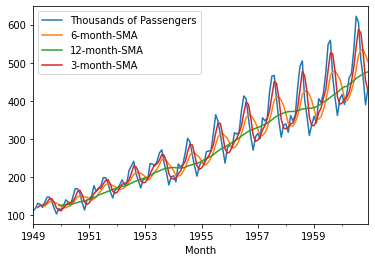

In [ ]:
airline.plot()

Exponential Weighted Moving Average ( EWMA)

1. Span: corresponds to what is commonly called EW Moving Avg.
2. CoM: Center of Mass c = (s-1)/2
3. Alpha: Specifies the smoothing factor directly 

In [ ]:
airline['EWMA12']=airline['Thousands of Passengers'].ewm(span=12,adjust=False).mean()
airline['EWMA6']=airline['Thousands of Passengers'].ewm(span=6,adjust=False).mean()
airline['EWMA3']=airline['Thousands of Passengers'].ewm(span=3,adjust=False).mean()
airline

,Thousands of Passengers,6-month-SMA,12-month-SMA,3-month-SMA,EWMA12,EWMA6,EWMA3
Month,,,,,,,
1949-01-01,112,NaN,NaN,NaN,112.000000,112.000000,112.000000
1949-02-01,118,NaN,NaN,NaN,112.923077,113.714286,115.000000
1949-03-01,132,NaN,NaN,120.666667,115.857988,118.938776,123.500000
1949-04-01,129,NaN,NaN,126.333333,117.879836,121.813411,126.250000
1949-05-01,121,NaN,NaN,127.333333,118.359861,121.581008,123.625000
...,...,...,...,...,...,...,...
1960-08-01,606,519.166667,463.333333,587.666667,494.898619,538.549357,582.096411
1960-09-01,508,534.000000,467.083333,578.666667,496.914216,529.820969,545.048205
1960-10-01,461,534.000000,471.583333,525.000000,491.388952,510.157835,503.024103


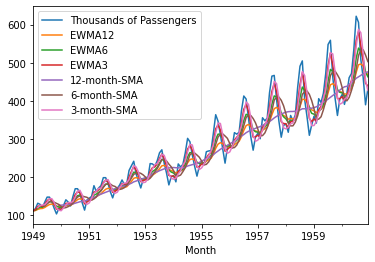

In [ ]:
airline[['Thousands of Passengers','EWMA12','EWMA6','EWMA3','12-month-SMA','6-month-SMA','3-month-SMA']].plot()

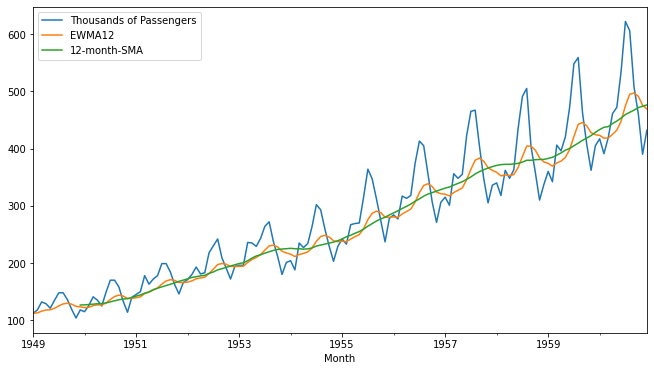

In [ ]:
airline[['Thousands of Passengers','EWMA12','12-month-SMA']].plot(figsize=(11,6)).autoscale(axis='x',tight=True)

In [ ]:
# What is the Meaning of Rolling?
# Ans: The idea is to divide the data into " Windows" of time frame 

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving starbucks.csv to starbucks.csv


In [ ]:
df = pd.read_csv('starbucks.csv',index_col='Date',parse_dates=True)
df

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
...,...,...
2018-12-24,60.5600,6323252
2018-12-26,63.0800,16646238
2018-12-27,63.2000,11308081


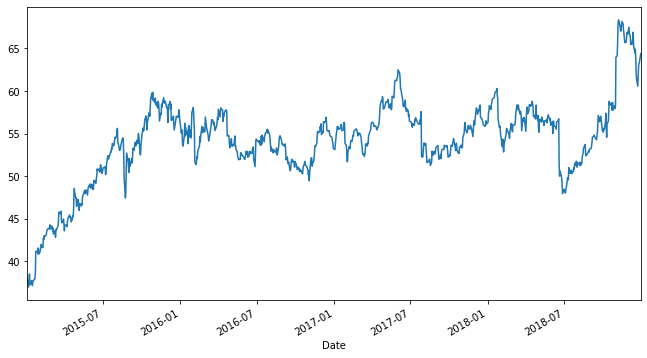

In [ ]:
df['Close'].plot(figsize=(11,6)).autoscale(axis='x',tight=True)

Lets Try to Use Rolling Means- This Rolling Method Provides row Entries, Where every entry is then representative of the windows

In [ ]:
df.rolling(window=30).mean()

,A,B
2020-01-01,NaN,NaN
2020-01-02,NaN,NaN
2020-01-03,NaN,NaN
2020-01-04,NaN,NaN
2020-01-05,NaN,NaN
2020-01-06,NaN,NaN
2020-01-07,NaN,NaN


In [ ]:
df['Close'].plot(figsize=(11,6)).autoscale(axis='x',tight=True)
df.rolling(window=30).mean()['Close'].plot()

KeyError: ignored

In [ ]:
# Expanding Options 

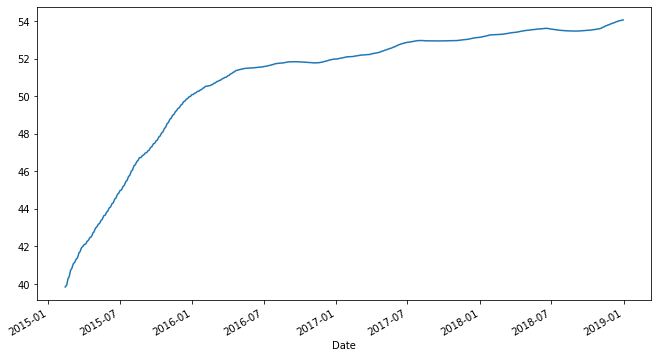

In [ ]:
df['Close'].expanding(min_periods=30).mean().plot(figsize=(11,6))

In [ ]:
np.arange('2020-06-15','2020-06-25',7, dtype='datetime64[D]')

array(['2020-06-15', '2020-06-22'], dtype='datetime64[D]')

In [ ]:
np.arange('2015','2020',dtype='datetime64[Y]')

array(['2015', '2016', '2017', '2018', '2019'], dtype='datetime64[Y]')

In [ ]:
id = pd.date_range('01/01/2020',periods=7,freq='D')
id

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
data = np.random.randn(7,2)
cols = ['A','B']
print(data)

[[ 1.66986272 -0.41210184]
 [ 0.55426504 -0.25566193]
 [ 0.69582425 -0.39274418]
 [ 0.16741341 -1.99974957]
 [ 0.61870874 -0.35353712]
 [ 0.11074419 -1.87795281]
 [-0.70557995 -0.08711284]]


In [ ]:
df = pd.DataFrame(data,id,cols)
df

,A,B
2020-01-01,1.669863,-0.412102
2020-01-02,0.554265,-0.255662
2020-01-03,0.695824,-0.392744
2020-01-04,0.167413,-1.999750
2020-01-05,0.618709,-0.353537
2020-01-06,0.110744,-1.877953
2020-01-07,-0.705580,-0.087113


In [ ]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
df.index.max() # This one will provide you exact time frame of Starting of the date

Timestamp('2020-01-07 00:00:00', freq='D')

In [ ]:
df.index.argmin()

0